In [1]:
from keras.applications.vgg16 import VGG16
model = VGG16()

553476096/553467096 [==============================] - 6s 0us/step


In [2]:
print(model.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

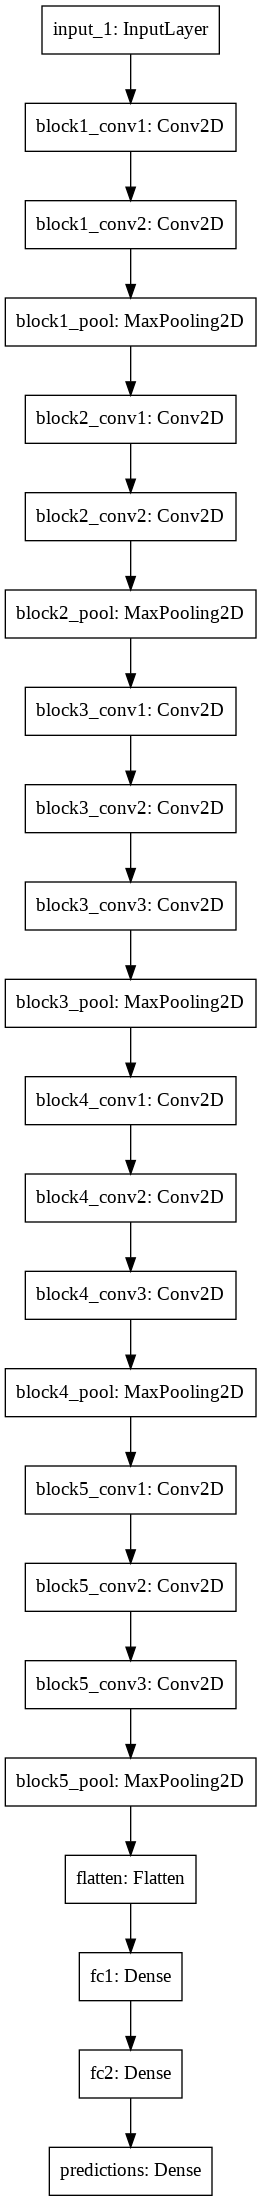

In [4]:
# Save the plot model
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='vgg.png')

* include_top (True): Whether or not to include the output layers for the model. You don’t need these if you are fitting the model on your own problem.

* weights (‘imagenet‘): What weights to load. You can specify None to not load pre-trained weights if you are interested in training the model yourself from scratch.

* input_tensor (None): A new input layer if you intend to fit the model on new data of a different size.

* input_shape (None): The size of images that the model is expected to take if you change the input layer.

* pooling (None): The type of pooling to use when you are training a new set of output layers.

* classes (1000): The number of classes (e.g. size of output vector) for the model.

## Test Image

In [13]:
from keras.preprocessing.image import load_img 
image = load_img('l05246-01.jpg', target_size=(224, 224))

In [14]:
# Convert iamge into numpy array
from keras.preprocessing.image import img_to_array 
image = img_to_array(image)

In [15]:
# Reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [16]:
# Preparing image for the VGG Model
from keras.applications.vgg16 import preprocess_input 
image = preprocess_input(image)

## Predictions

In [17]:
# Predict the probability across all output classes
yhat = model.predict(image)

In [18]:
yhat

array([[7.23401650e-09, 5.37875984e-08, 5.39359946e-10, 7.22794491e-10,
        1.47394119e-09, 2.69092681e-09, 6.97845171e-10, 1.64624332e-08,
        7.12834591e-09, 4.32403269e-08, 5.68679193e-09, 2.07381525e-08,
        2.49172754e-08, 6.59412702e-09, 1.87795433e-08, 1.07968425e-08,
        4.53652014e-08, 1.96289847e-08, 2.30748416e-08, 1.32511442e-08,
        5.48071277e-09, 2.88440027e-09, 1.02722995e-08, 6.06083628e-09,
        3.81229182e-09, 1.04063136e-09, 2.86128787e-09, 5.22848893e-08,
        8.90660168e-09, 3.67567132e-08, 1.60551537e-08, 2.14095959e-08,
        1.12451346e-08, 2.15328133e-09, 2.53228793e-09, 3.69228048e-09,
        9.42698541e-09, 9.99380689e-10, 5.74472425e-09, 8.02529154e-09,
        6.89774549e-09, 1.89104066e-09, 3.99003097e-09, 6.29424823e-09,
        1.36626310e-08, 1.90184970e-08, 1.13882201e-08, 8.48830517e-09,
        3.08079384e-09, 4.56000970e-09, 3.42058337e-09, 3.53866159e-09,
        3.67007367e-08, 6.00542123e-08, 4.43875727e-08, 3.223729

In [19]:
from keras.applications.vgg16 import decode_predictions
# Convert the probabilities to class labels
label = decode_predictions(yhat)
# Retrieve the most likely result (Highest probability)
label = label[0][0]
# Print classification
print("%s (%.2f%%)" % (label[1], label[2]*100))

coffee_mug (76.02%)
